## Import libraries 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the dataset as a dataframe:

In [19]:
df = pd.read_csv("Weather Dataset.csv")


## Clean and preprocess the data:

In [20]:
# handle missing values
df = df.dropna()

# remove duplicates 
df = df.drop_duplicates()

# handle incorrect data
df = df[(-90 < df['Temperature (C)']) & (df['Temperature (C)'] < 60)] # checks if temperature is withen acceptable range
df = df[(-90 < df['Apparent Temperature (C)']) & (df['Apparent Temperature (C)'] < 60)] # checks if temperature is withen acceptable range
df = df[(df['Humidity'] >= 0) & (df['Humidity'] <= 1)] # checks to see if humidity is from 0 to 1 range
df = df[(df['Wind Speed (km/h)'] >= 0) & (df['Wind Bearing (degrees)'] >= 0) & (df['Visibility (km)'] >= 0)] # checks to see if values are positive

df = df.sort_values(by='Formatted Date', ascending=True) # sort date in ascending order

## Plot temperature over time:

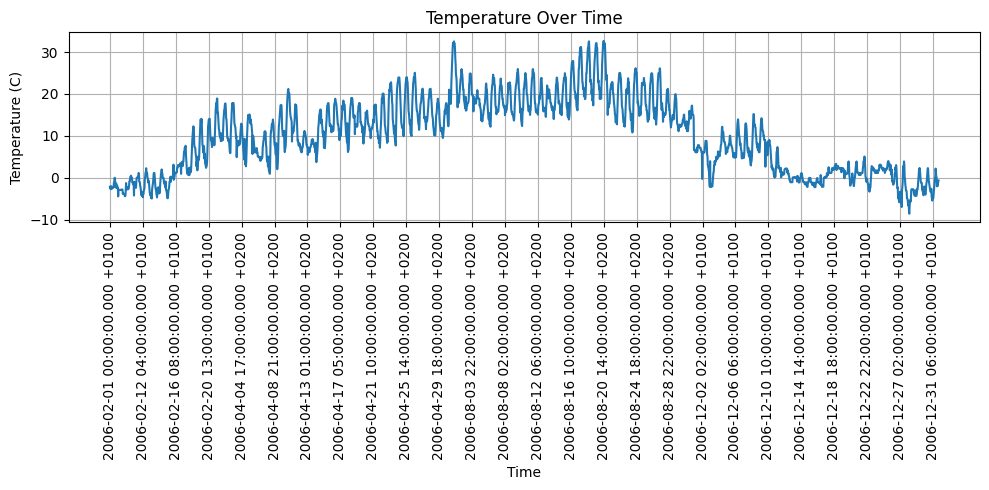

In [21]:
# plot graph
plt.figure(figsize=(10, 5))
plt.plot(df['Formatted Date'], df['Temperature (C)'])
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.xticks(df['Formatted Date'][::100], rotation='vertical')
plt.tight_layout()
plt.show()

## Create a histogram of temperature distribution:

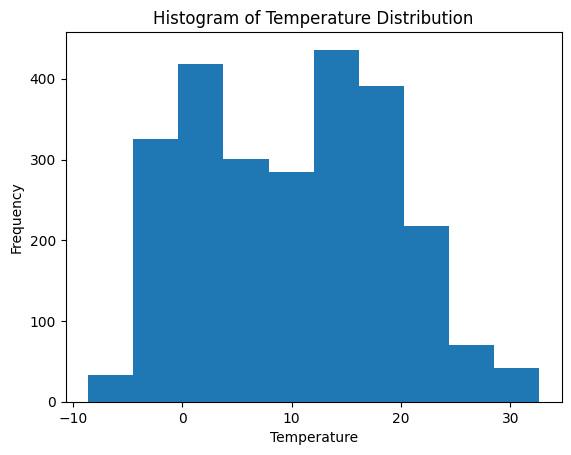

In [22]:
plt.hist(df['Temperature (C)'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Distribution')
plt.show()

## Plot a scatter plot of temperature vs. humidity:

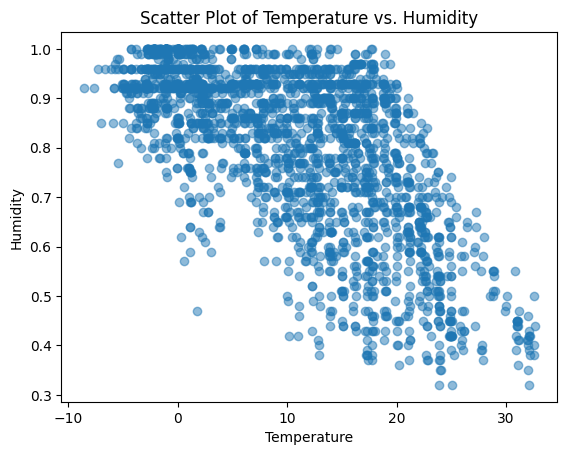

In [23]:
plt.scatter(df['Temperature (C)'], df['Humidity'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.show()

## Generate a correlation heatmap of the dataset:

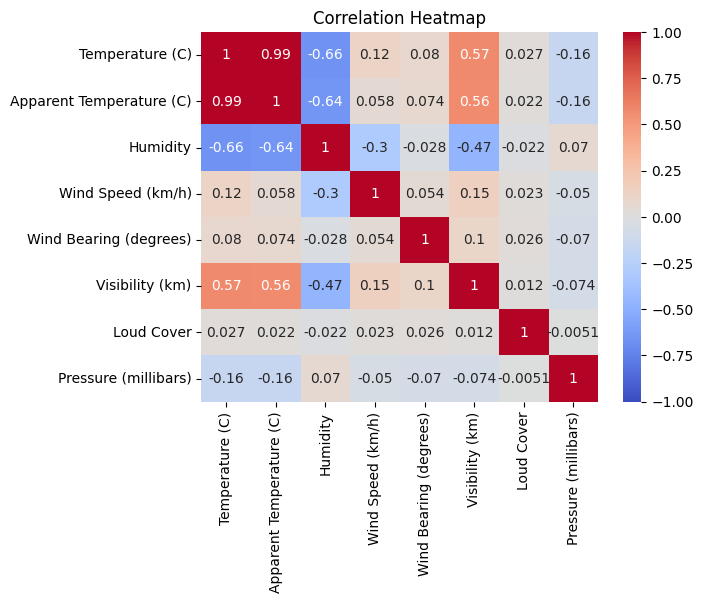

In [24]:
import seaborn as sb

df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = df_numeric.corr()

sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Explain the output in a markdown cell.

### Correlation Heatmap Explanation

The correlation heatmap visualizes the relationships between different numerical variables in the dataset. Each cell represents the correlation coefficient between two variables, with values ranging from -1 to 1:

- **1**: Perfect positive correlation (as one variable increases, the other also increases).
- **-1**: Perfect negative correlation (as one variable increases, the other decreases).
- **0**: No correlation (no predictable relationship between the variables).

In the heatmap, you can identify variables with strong correlations to understand how they are related. For instance, a negative correlation (-66) between temperature and humidity would indicate that as temperature rises, humidity tends to decrease and vice versa.

Also, there is a very strong positive correlation (0.99) between temperature and apparent temperature.
